In [1]:
import pandas as pd
import numpy as np
import statistics as std
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn import preprocessing

In [2]:
df = pd.read_excel('data/ID_data_mass_18122012.xlsx', sheet_name='VU', header = 1)


D:\Users\misha\Documents\Anaconda\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


In [3]:
df.describe()

,Unnamed: 0,Unnamed: 1,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,...,Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,КГФ.1
count,186,186,186.0,186.00,186,186,186,186,186,186,...,183,179.0,179.000000,24.000000,94,24,94.00,24,24,71.00
unique,15,178,40.0,15.00,174,180,178,140,174,170,...,26,114.0,114.000000,7.000000,26,2,22.00,24,24,50.00
top,21303,2008-02-08 00:00:00,3548.5,9.53,206,-,-,215,-,-,...,-,89.6,88.428325,0.787416,782,1000,0.66,кг/с,г/м3,0.18
freq,19,2,10.0,38.00,3,4,7,7,4,11,...,47,6.0,6.000000,7.000000,11,23,9.00,1,1,4.00


In [4]:
df = df[1:]

In [5]:
df.head(5)

,Unnamed: 0,Unnamed: 1,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,...,Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ,КГФ.1
1,804,2008-06-05 00:00:00,3576.3,7.94,249.6,370.1,101.8,249,359.6,101.8,...,-,93.6,92.376018,0.806017,801,1000,0.669449,2.782623,311.9094,NaN
2,804,2008-06-06 00:00:00,3576.3,9.53,233.5,364.6,101.3,231,338.1,102.4,...,-,92.9,91.685171,0.806017,801,1000,0.669449,3.697781,288.6003,NaN
3,804,2008-06-07 00:00:00,3576.3,11.11,213.4,357.1,101.6,211,314.8,100.6,...,-,91.4,90.204787,0.806017,801,1000,0.669449,4.515073,248.7906,NaN
4,804,2008-06-08 00:00:00,3576.3,12.7,191.6,347.4,98.4,187,291.5,99,...,-,89.2,88.033555,0.806017,801,1000,0.669449,5.217673,223.5591,NaN
5,804,2008-06-09 00:00:00,3576.3,14.29,171.9,337.7,99.2,169,270.3,99.5,...,-,89.7,88.527017,0.806017,801,1000,0.669449,5.765092,215.1486,NaN


In [6]:
df = df.rename(columns = {'Unnamed: 0' :'№', 'Unnamed: 1':'Date'})

In [7]:
df.columns

Index(['№', 'Date', 'Глубина манометра', 'Dшт', 'Руст', 'Рзаб', 'Pлин',
       'Руст.1', 'Рзаб.1', 'Рлин', 'Туст', 'Тна шлейфе', 'Тзаб', 'Tлин',
       'Дебит газа', 'Дебит ст. конд.', 'Дебит воды', 'Дебит смеси',
       'Дебит гааз', 'Дебит кон нестабильный', 'Дебит воды.1', 'Нэф',
       'Рпл. Тек (послед точка на КВД)', 'Рпл. Тек (Расчет по КВД)',
       'Рпл. Тек (Карноухов)', 'Pсб', 'Pсб.1', 'Ro_g', 'Ro_c', 'Ro_w',
       'Удельная плотность газа ', 'G_total', 'КГФ', 'КГФ.1'],
      dtype='object')

In [9]:
df['КГФ.1'] = df['КГФ.1'].apply(lambda x: x*1000)
df['КГФ'] = df['КГФ'].mask(df['КГФ'].isna(), df['КГФ.1'])
df = df.drop(['КГФ.1'], axis=1)

# 1. Удалить строки, где обе целевых переменные пустые

In [10]:
#df= df[(df[df != 'NaN') & (df['КГФ'] != 'NaN')] 

In [11]:
df.dropna(axis = 0, subset = ['G_total','КГФ'], how = 'all', inplace = True)

# 2. Пропуски заполнить NaN

In [12]:
name_columns =  df.columns

In [13]:
df = df.replace(['-','не спускался'], np.nan)

## Замена на -100

In [14]:
df_twice = df.copy()
for name in name_columns:
    df_twice[name] = df_twice[name]. fillna (-100)

In [ ]:
df

# 3. Построить гистраграмму важности признаков по критерию gain_ratio (нормированный прирост информации)

In [17]:

del df_twice["№"]
del df_twice["Date"]
df_twice = df_twice.apply(pd.to_numeric)
xTrain = df_twice.iloc[:,0:29]
yTrain = df_twice.iloc[:,29:32]


In [16]:
df_twice.head()

,№,Date,Глубина манометра,Dшт,Руст,Рзаб,Pлин,Руст.1,Рзаб.1,Рлин,...,Рпл. Тек (Расчет по КВД),Рпл. Тек (Карноухов),Pсб,Pсб.1,Ro_g,Ro_c,Ro_w,Удельная плотность газа,G_total,КГФ
1,804,2008-06-05,3576.3,7.94,249.6,370.1,101.8,249.0,359.6,101.8,...,56.5,-100.0,93.6,92.376018,0.806017,801.0,1000.0,0.669449,2.782623,311.9094
2,804,2008-06-06,3576.3,9.53,233.5,364.6,101.3,231.0,338.1,102.4,...,56.5,-100.0,92.9,91.685171,0.806017,801.0,1000.0,0.669449,3.697781,288.6003
3,804,2008-06-07,3576.3,11.11,213.4,357.1,101.6,211.0,314.8,100.6,...,56.5,-100.0,91.4,90.204787,0.806017,801.0,1000.0,0.669449,4.515073,248.7906
4,804,2008-06-08,3576.3,12.70,191.6,347.4,98.4,187.0,291.5,99.0,...,56.5,-100.0,89.2,88.033555,0.806017,801.0,1000.0,0.669449,5.217673,223.5591
5,804,2008-06-09,3576.3,14.29,171.9,337.7,99.2,169.0,270.3,99.5,...,56.5,-100.0,89.7,88.527017,0.806017,801.0,1000.0,0.669449,5.765092,215.1486


In [ ]:
#del df_norm["КГФ"]
#del df_norm["G_total"]

In [18]:
clf = RandomForestRegressor(max_depth=20, random_state=0)
clf.fit(xTrain, yTrain)

RandomForestRegressor(max_depth=20, random_state=0)

In [ ]:
print(xTrain)

In [ ]:
print(yTrain)

In [ ]:
df_norm.head()

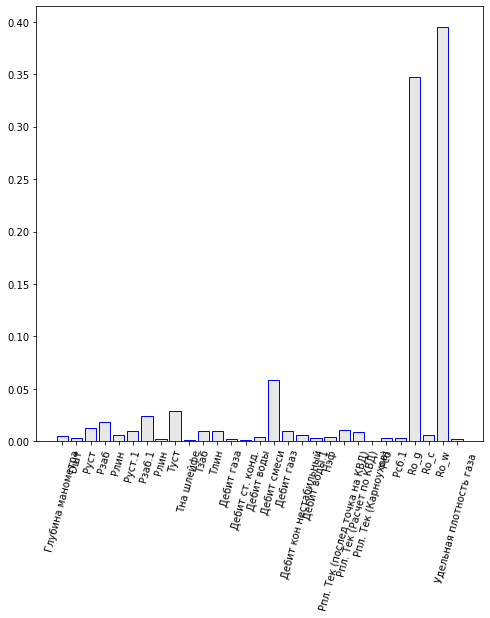

In [20]:
name_columns =  df_twice.columns
plt.figure(figsize=(8,8))
plt.bar(name_columns[:29], clf.feature_importances_, color=(0.1, 0.1, 0.1, 0.1),  edgecolor='blue')
plt.xticks(rotation=75)
plt.show()

In [24]:
df = df.drop(['№','Date', 'Ro_w'], axis=1)

# 4. Построить тепловую карту признаков (матрица корреляций всех признаков со всеми, в том числе целевыми переменными), для удобства коэффициент корреляции берите по модулю

In [ ]:
df.info()

In [ ]:
#df = abs(df)

<AxesSubplot:>

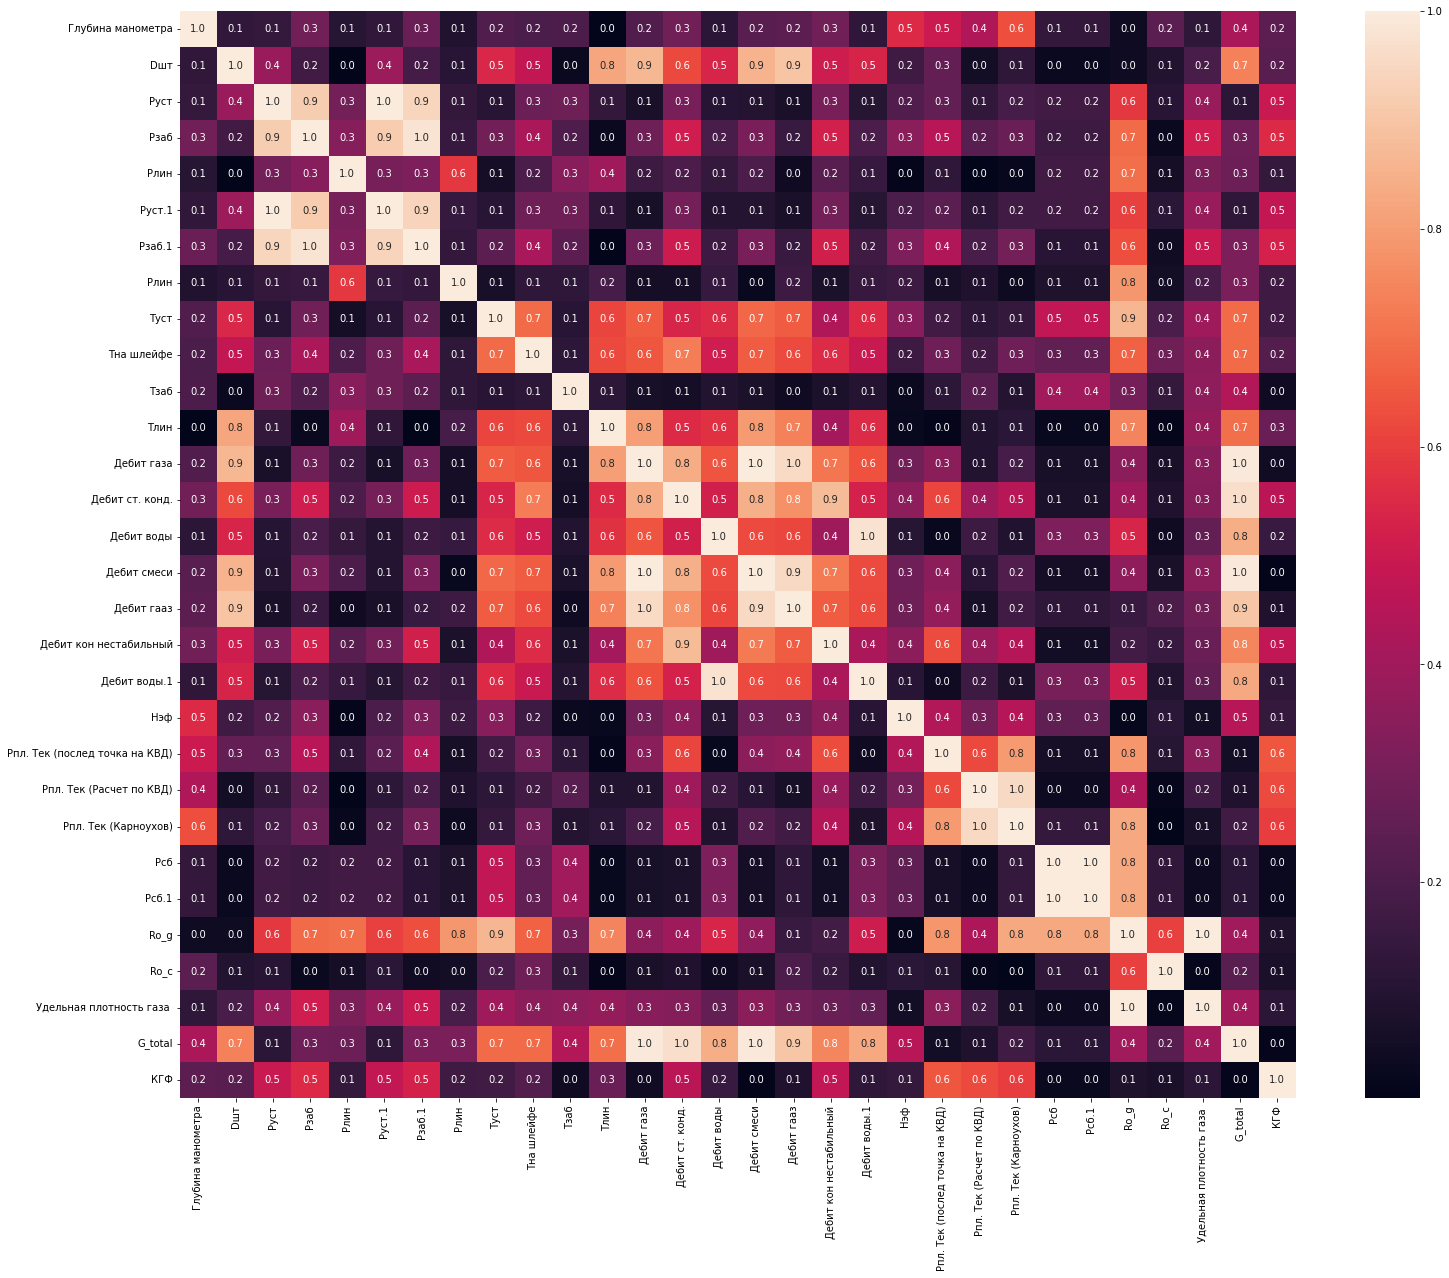

In [25]:
plt.subplots(figsize=(25, 20))
sns.heatmap(abs(df.corr()), annot = True, fmt='.1f')
#sns.heatmap(df.corr(), annot = True, fmt='.1g')

# 5. Для каждого признака построить график распределения с отложенными на нем линиями первого и третьего квартилей

In [26]:
name_columns = df.columns
name_columns

Index(['Глубина манометра', 'Dшт', 'Руст', 'Рзаб', 'Pлин', 'Руст.1', 'Рзаб.1',
       'Рлин', 'Туст', 'Тна шлейфе', 'Тзаб', 'Tлин', 'Дебит газа',
       'Дебит ст. конд.', 'Дебит воды', 'Дебит смеси', 'Дебит гааз',
       'Дебит кон нестабильный', 'Дебит воды.1', 'Нэф',
       'Рпл. Тек (послед точка на КВД)', 'Рпл. Тек (Расчет по КВД)',
       'Рпл. Тек (Карноухов)', 'Pсб', 'Pсб.1', 'Ro_g', 'Ro_c',
       'Удельная плотность газа ', 'G_total', 'КГФ'],
      dtype='object')

In [30]:
def create_graph(name):
    #sns.distplot(df[name])
    sns.kdeplot(df[name], shade=True)
    plt.axvline(column_first_quantile(name), 1, 0.007, color = 'red')
    plt.axvline(column_third_quantile(name), 1, 0.007, color = 'red')
    #fig = sns_plot.get_figure()
    plt.show()
    

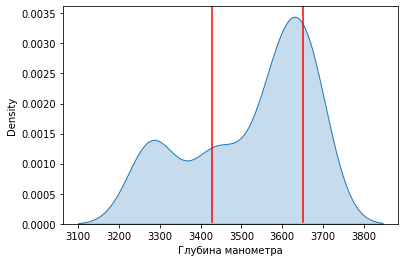

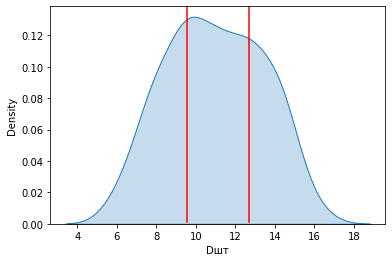

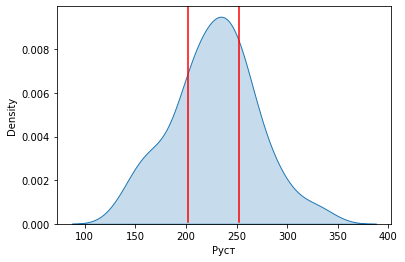

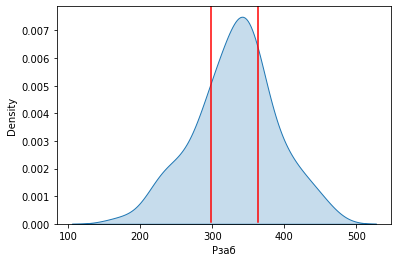

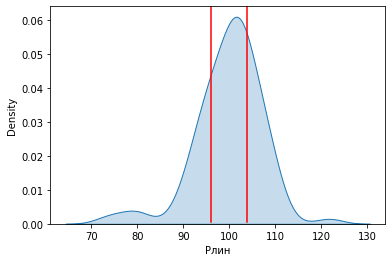

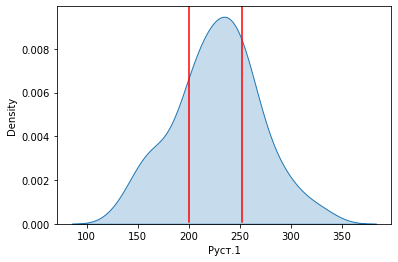

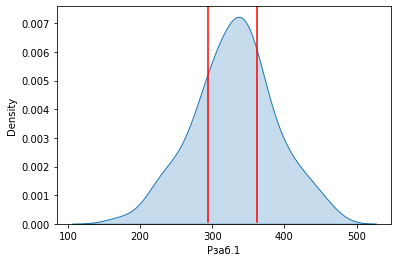

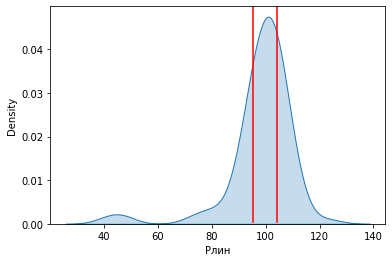

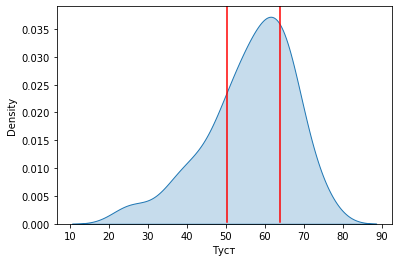

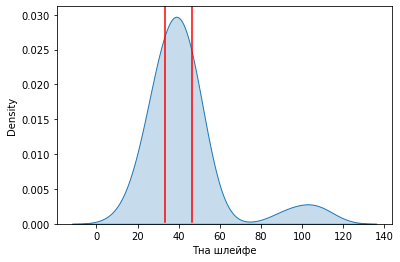

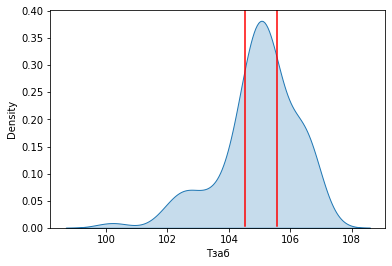

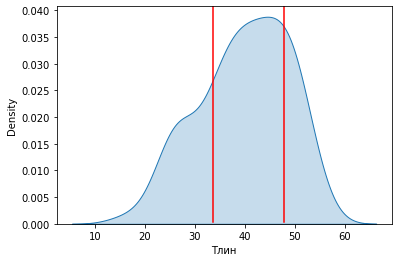

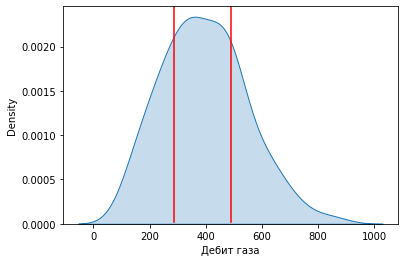

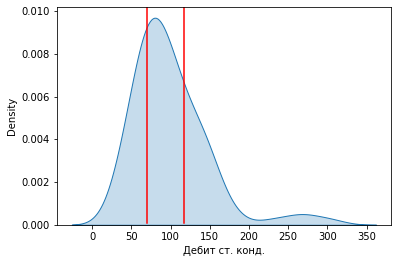

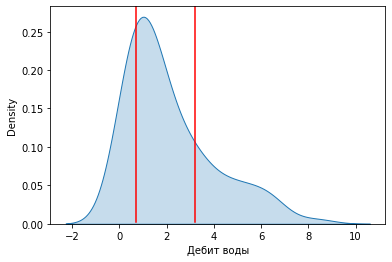

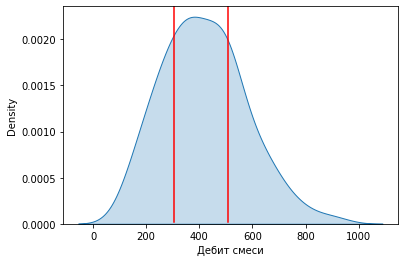

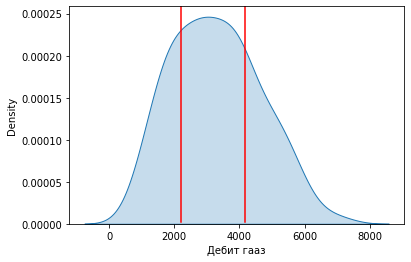

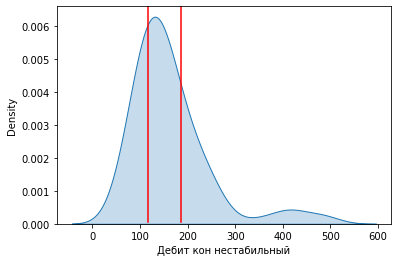

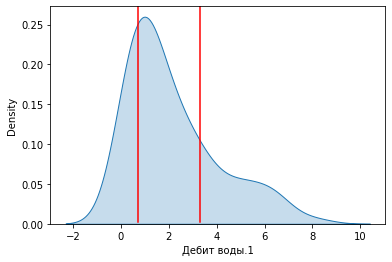

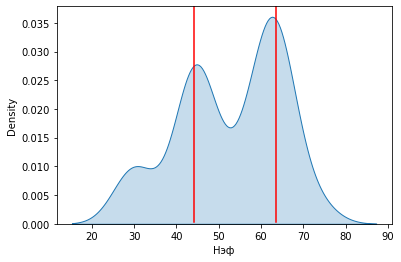

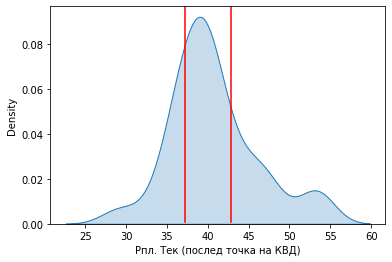

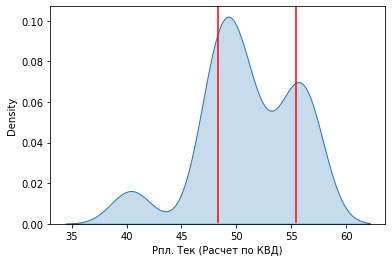

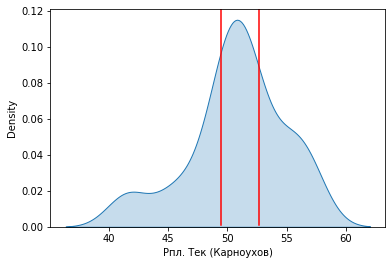

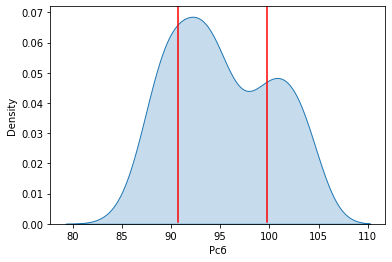

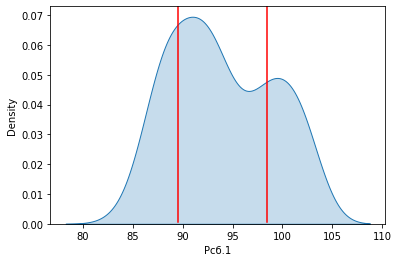

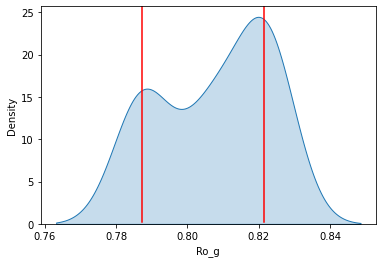

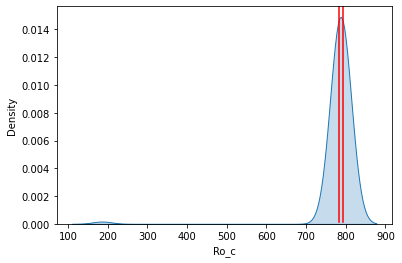

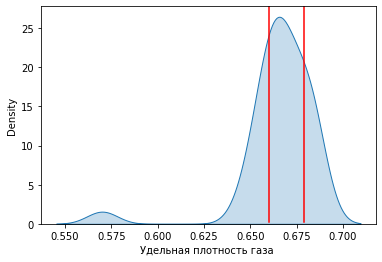

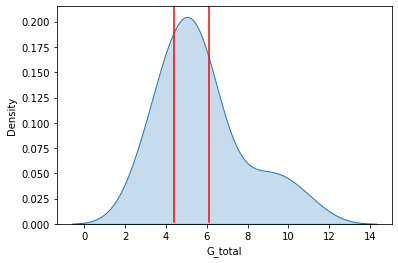

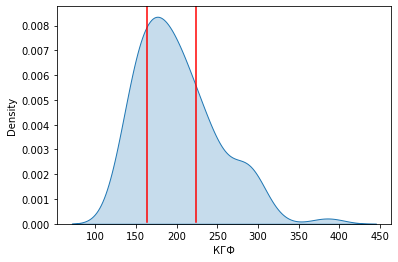

In [31]:
for name in name_columns:
    create_graph(name)

# 6. Для каждого признака посчитать элементы описательной статистики

In [ ]:
df

In [28]:
name_columns = df.columns

In [27]:
def column_count(name): #количество
    return len(df[name])

def column_min(name):
    return df[name].min()

def column_first_quantile(name):
    return df[name].quantile(0.25)

def column_median(name):
    return df[name].quantile(0.5)

def column_third_quantile(name):
    return df[name].quantile(0.75)

def column_max(name):
    return df[name].max()

def column_mean(name):
    return df[name].mean()

def column_std(name):
    return df[name].std()

def column_power(name):
    return df[name].value_counts().count()

def interquartile_range(name):
    return column_third_quantile(name) - column_first_quantile(name)







In [29]:
for name in name_columns:
    print(f'{name}: ')
    print(f"\tCount: {column_count(name)}\n\tMin: {column_min(name)}\n\tFirst quantile: {column_first_quantile(name)}\n\tMedian: {column_median(name)}\n\tThird quantile: {column_third_quantile(name)}\n\tMax: {column_max(name)}\n\tMean: {column_mean(name)}\n\tStd: {column_std(name)}\n\tPower: {column_power(name)}\n\tInterquartile range: {interquartile_range(name)}\n")

Глубина манометра: 
	Count: 93
	Min: 3276.0
	First quantile: 3427.625
	Median: 3579.0
	Third quantile: 3652.25
	Max: 3670.0
	Mean: 3524.086666666665
	Std: 144.4748616989175
	Power: 20
	Interquartile range: 224.625

Dшт: 
	Count: 93
	Min: 6.35
	First quantile: 9.53
	Median: 11.11
	Third quantile: 12.7
	Max: 15.88
	Mean: 10.951182795698928
	Std: 2.4231724846026914
	Power: 10
	Interquartile range: 3.17

Руст: 
	Count: 93
	Min: 138.1578947368421
	First quantile: 201.63675
	Median: 229.89473684210526
	Third quantile: 252.0
	Max: 337.1081081081081
	Mean: 228.29341238459256
	Std: 41.89723834031322
	Power: 87
	Interquartile range: 50.363249999999994

Рзаб: 
	Count: 93
	Min: 174.0
	First quantile: 297.7975
	Median: 337.78917249999995
	Third quantile: 364.15000000000003
	Max: 458.6
	Mean: 331.76225516666665
	Std: 56.48123451010517
	Power: 88
	Interquartile range: 66.35250000000002

Pлин: 
	Count: 93
	Min: 73.30663802559425
	First quantile: 95.94595105865976
	Median: 100.8
	Third quantile: 103.86

## Исходя из полученных данных, мы можем сделать вывод о том, что нужно оставить признаки:
1. "Глубина манометра";
2. "Рлин";
3. "Дебит ст. конд";
4. "Нэф";
5. "Рпл. Тек (послед точка на КВД)";
6. "Рпл. Тек (Расчет по КВД)".